In [1]:
import pandas as pd
import numpy as np
import statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\Victor\iCloudDrive\San Francisco State University\dataset_interpolate.csv", index_col=[0])
year = df['Year']
week = df['Week']
period = df['Period']

## Remove the columns that are inherently duplicates of other columns

### In example, labor force/labor force participation rate, or Poverty Threshold (single)/(2 people)

In [3]:
X_variables = df.drop(['Year', 'Period', 'Week', 'labor force', 'employment', 'unemployment', 
                       'Poverty Threshold (2 People)'], axis=1)
y_variable = X_variables.pop('Overall Number of Homeless')

### According to statsmodel, add a constant column for regression purposes

In [4]:
X_variables = add_constant(X_variables)
X_variables

,const,labor force participation rate,employment-population ratio,unemployment rate,Poverty Rate (CA),Poverty Threshold (single),SNAP Beneficiaries,House Affordability Index (HAI),California Median Weekly Wages,Median House Prices
0,1.0,63.8,55.9,12.3,0.162333,11267.66667,3602170.0,0.530000,1066.000000,279220.0
1,1.0,63.7,55.9,12.2,0.162667,11287.33333,3619055.0,0.523333,1049.333333,271370.0
2,1.0,63.6,55.9,12.1,0.163000,11307.00000,3669962.0,0.516667,1032.666667,286550.0
3,1.0,63.6,55.9,12.0,0.163333,11326.66667,3679671.0,0.510000,1016.000000,294140.0
4,1.0,63.5,55.9,12.0,0.163667,11346.33333,3727005.0,0.513333,1027.000000,292850.0
...,...,...,...,...,...,...,...,...,...,...
117,1.0,60.8,54.8,9.8,0.118000,12951.00000,4874688.0,0.270000,1466.000000,711300.0
118,1.0,59.8,54.6,8.7,0.118000,12945.00000,4893360.0,0.280000,1466.000000,698980.0
119,1.0,60.2,54.5,9.3,0.118000,12939.00000,4893360.0,0.290000,1466.000000,717930.0
120,1.0,60.0,54.6,9.0,0.148000,12909.50000,4893360.0,0.300000,1466.000000,699920.0


## The next step is to find variables that are highly intercorrelate with each other.

### We use the Variance Inflation Factor (VIF), which calculates how much variables affect each other. Typically, VIF over 10 are considered to be highly correlated.

### In the first run, we see that the "employment-population ratio" has an extremely high VIF, so we discard it. This makes sense since we have the unemployment rate.

In [5]:
[(X_variables.columns[i], variance_inflation_factor(X_variables.values, i)) for i in range(X_variables.shape[1])]

[('const', 183800.05074074326),
 ('labor force participation rate', 299.5137916641101),
 ('employment-population ratio', 2076.9763898221895),
 ('unemployment rate', 1793.7179405789266),
 ('Poverty Rate (CA)', 10.185505323677258),
 ('Poverty Threshold (single)', 40.69434110668755),
 ('SNAP Beneficiaries', 9.058168221383978),
 ('House Affordability Index (HAI)', 10.244709423418),
 ('California Median Weekly Wages', 13.318789071098267),
 ('Median House Prices', 30.1106197852401)]

### On the second run, we see the average VIF going down significantly. We remove the Poverty Threshold (single), which has the highest VIF value.

In [6]:
X_variables.drop('employment-population ratio', axis=1, inplace=True)
[(X_variables.columns[i], variance_inflation_factor(X_variables.values, i)) for i in range(X_variables.shape[1])]

[('const', 149539.97337432439),
 ('labor force participation rate', 18.098205085674063),
 ('unemployment rate', 6.012019016193717),
 ('Poverty Rate (CA)', 9.896644675430952),
 ('Poverty Threshold (single)', 37.16747802441312),
 ('SNAP Beneficiaries', 8.653948992389841),
 ('House Affordability Index (HAI)', 9.900231471702776),
 ('California Median Weekly Wages', 13.135663977008377),
 ('Median House Prices', 27.640349278471934)]

### Finally, as we discard the Poverty Threshold (Single), we are left with 7 variables, each with acceptable VIF values.

In [7]:
X_variables.drop('Poverty Threshold (single)', axis=1, inplace=True)
[(X_variables.columns[i], variance_inflation_factor(X_variables.values, i)) for i in range(X_variables.shape[1])]

[('const', 109510.15526282687),
 ('labor force participation rate', 17.219297758384307),
 ('unemployment rate', 5.986679212712192),
 ('Poverty Rate (CA)', 9.889400294860621),
 ('SNAP Beneficiaries', 6.997607964957551),
 ('House Affordability Index (HAI)', 9.78261543243305),
 ('California Median Weekly Wages', 8.360588072932236),
 ('Median House Prices', 17.85128140334336)]

# In other to finalize the final model, we used an external software Minitab, to perform a stepwise regresssion. 

## The stepwise regression narrowed the best model with 4 variables,

- Unemployment rate
- Poverty rate
- California Median Weekly Wages
- Median House Prices

In [9]:
X_variables.drop(['labor force participation rate', 'SNAP Beneficiaries', 
                  'House Affordability Index (HAI)'], axis=1, inplace=True)
X_variables

,const,unemployment rate,Poverty Rate (CA),California Median Weekly Wages,Median House Prices
0,1.0,12.3,0.162333,1066.000000,279220.0
1,1.0,12.2,0.162667,1049.333333,271370.0
2,1.0,12.1,0.163000,1032.666667,286550.0
3,1.0,12.0,0.163333,1016.000000,294140.0
4,1.0,12.0,0.163667,1027.000000,292850.0
...,...,...,...,...,...
117,1.0,9.8,0.118000,1466.000000,711300.0
118,1.0,8.7,0.118000,1466.000000,698980.0
119,1.0,9.3,0.118000,1466.000000,717930.0
120,1.0,9.0,0.148000,1466.000000,699920.0


In [10]:
X_variables['unemployment rate'] = X_variables['unemployment rate'].transform(lambda x:x/100)
X_variables

,const,unemployment rate,Poverty Rate (CA),California Median Weekly Wages,Median House Prices
0,1.0,0.123,0.162333,1066.000000,279220.0
1,1.0,0.122,0.162667,1049.333333,271370.0
2,1.0,0.121,0.163000,1032.666667,286550.0
3,1.0,0.120,0.163333,1016.000000,294140.0
4,1.0,0.120,0.163667,1027.000000,292850.0
...,...,...,...,...,...
117,1.0,0.098,0.118000,1466.000000,711300.0
118,1.0,0.087,0.118000,1466.000000,698980.0
119,1.0,0.093,0.118000,1466.000000,717930.0
120,1.0,0.090,0.148000,1466.000000,699920.0


In [11]:
sm.OLS(y_variable, X_variables).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Overall Number of Homeless   R-squared:                       0.808
Model:                                    OLS   Adj. R-squared:                  0.801
Method:                         Least Squares   F-statistic:                     122.7
Date:                        Mon, 19 Apr 2021   Prob (F-statistic):           6.54e-41
Time:                                15:23:11   Log-Likelihood:                -1231.9
No. Observations:                         122   AIC:                             2474.
Df Residuals:                             117   BIC:                             2488.
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            8.75e+04    1.8e+04      4.869      0.000    5.19e+04    1.23e+05
unemployment rate               2.447e+05   2.18e+04     11.230      0.000    2.02e+05    2.88e+05
Poverty Rate (CA)              -2.925e+05   6.12e+04     -4.781      0.000   -4.14e+05   -1.71e+05
California Median Weekly Wages    46.8961      9.977      4.700      0.000      27.137      66.655
Median House Prices                0.0162      0.010      1.549      0.124      -0.005       0.037
==============================================================================
Omnibus:                       16.230   Durbin-Watson:                   0.282
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.754
Skew:                           0.583   Prob(JB):                     5.70e-07
Kurtosis:                       5.073   Cond. No.                     5.81e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.81e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# The above model generates an adjusted R2 score of 0.801.

## Looking at the plot of the y-variable, this shows some curvature, so in order to improve on the model, we decided to square the values (adding a higher level of polynomial degree)

In [12]:
for i in X_variables.columns:
    if i == 'const':
        continue
    col = i+'**2'
    X_variables[col]=X_variables[i].transform(lambda x:x**2)

# The model shows significant improvement, with a final adj R2 score of 0.956.

In [13]:
sm.OLS(y_variable, X_variables).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Overall Number of Homeless   R-squared:                       0.958
Model:                                    OLS   Adj. R-squared:                  0.956
Method:                         Least Squares   F-statistic:                     440.6
Date:                        Mon, 19 Apr 2021   Prob (F-statistic):           7.12e-77
Time:                                15:23:30   Log-Likelihood:                -1138.6
No. Observations:                         122   AIC:                             2291.
Df Residuals:                             115   BIC:                             2311.
Df Model:                                   6                                         
Covariance Type:                    nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              5.432e+05   3.35e+04     16.192      0.000    4.77e+05     6.1e+05
unemployment rate                 -4.258e+05   1.06e+05     -4.035      0.000   -6.35e+05   -2.17e+05
Poverty Rate (CA)                  4.162e+04   4.94e+04      0.842      0.401   -5.63e+04    1.39e+05
California Median Weekly Wages     -588.4546     54.501    -10.797      0.000    -696.410    -480.500
Median House Prices                  -0.3119      0.025    -12.465      0.000      -0.361      -0.262
unemployment rate**2               2.354e+06   5.58e+05      4.216      0.000    1.25e+06    3.46e+06
Poverty Rate (CA)**2              -1.185e+05   1.93e+04     -6.141      0.000   -1.57e+05   -8.03e+04
California Median Weekly Wages**2     0.2509      0.022     11.533      0.000       0.208       0.294
Median House Prices**2             3.556e-07   2.71e-08     13.127      0.000    3.02e-07    4.09e-07
==============================================================================
Omnibus:                        0.430   Durbin-Watson:                   0.405
Prob(Omnibus):                  0.807   Jarque-Bera (JB):                0.187
Skew:                           0.082   Prob(JB):                        0.911
Kurtosis:                       3.101   Cond. No.                     1.75e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+15. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model without Pandemic

## In order to see the effect of the pandemic, the team extrapolated values from 2019, and extended those values into 2020.

## We would then compare the model with and without a Pandemic.

### We first remove the higher polynomial columns

In [14]:
X_variables.drop(['const', 'unemployment rate**2', 'Poverty Rate (CA)**2', 'California Median Weekly Wages**2', 
                  'Median House Prices**2'], axis=1, inplace=True)
X_variables

,unemployment rate,Poverty Rate (CA),California Median Weekly Wages,Median House Prices
0,0.123,0.162333,1066.000000,279220.0
1,0.122,0.162667,1049.333333,271370.0
2,0.121,0.163000,1032.666667,286550.0
3,0.120,0.163333,1016.000000,294140.0
4,0.120,0.163667,1027.000000,292850.0
...,...,...,...,...
117,0.098,0.118000,1466.000000,711300.0
118,0.087,0.118000,1466.000000,698980.0
119,0.093,0.118000,1466.000000,717930.0
120,0.090,0.148000,1466.000000,699920.0


### Add the year back into the X_variables

In [15]:
X_variables['year'] = year
X_variables

,unemployment rate,Poverty Rate (CA),California Median Weekly Wages,Median House Prices,year
0,0.123,0.162333,1066.000000,279220.0,2011
1,0.122,0.162667,1049.333333,271370.0,2011
2,0.121,0.163000,1032.666667,286550.0,2011
3,0.120,0.163333,1016.000000,294140.0,2011
4,0.120,0.163667,1027.000000,292850.0,2011
...,...,...,...,...,...
117,0.098,0.118000,1466.000000,711300.0,2020
118,0.087,0.118000,1466.000000,698980.0,2020
119,0.093,0.118000,1466.000000,717930.0,2020
120,0.090,0.148000,1466.000000,699920.0,2021


## In order to extrapolate the X-variables from 2020, we use the difference between each following month, and add those residuals from the start of 2020. 

In [16]:
x_prepandemic = X_variables.loc[(2018 < X_variables.year) & (X_variables.year < 2020)]
x_prepandemic.drop('year', axis=1, inplace=True)
x_prepandemic

C:\Users\Victor\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,unemployment rate,Poverty Rate (CA),California Median Weekly Wages,Median House Prices
96,0.043,0.127167,1400.000000,536830.0
97,0.043,0.126333,1374.666667,534120.0
98,0.042,0.125500,1349.333333,565740.0
99,0.041,0.124667,1324.000000,603030.0
100,0.041,0.123833,1319.000000,610940.0
101,0.041,0.123000,1314.000000,610720.0
102,0.041,0.122167,1309.000000,607990.0
103,0.041,0.121333,1357.666667,617410.0
104,0.041,0.120500,1406.333333,605680.0
105,0.041,0.119667,1455.000000,605280.0


In [19]:
residual = []
for col in x_prepandemic.columns:
    dummy = []
    for i,j in enumerate(x_prepandemic[col]):
        if i == 0:
            continue
        else:
            dummy.append(x_prepandemic[col].iloc[i]-x_prepandemic[col].iloc[i-1])
    residual.append(dummy)

## We create a test dataframe, that contains the values all the way to Jan 2020. We add the residuals to each month, starting at Jan 2020.

In [17]:
test = X_variables.iloc[:109]
test.drop('year', axis=1, inplace=True)
test

C:\Users\Victor\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,unemployment rate,Poverty Rate (CA),California Median Weekly Wages,Median House Prices
0,0.123,0.162333,1066.000000,279220.0
1,0.122,0.162667,1049.333333,271370.0
2,0.121,0.163000,1032.666667,286550.0
3,0.120,0.163333,1016.000000,294140.0
4,0.120,0.163667,1027.000000,292850.0
...,...,...,...,...
104,0.041,0.120500,1406.333333,605680.0
105,0.041,0.119667,1455.000000,605280.0
106,0.041,0.118833,1456.000000,589770.0
107,0.042,0.118000,1457.000000,614880.0


## Add those residuals

In [20]:
for i in range(len(residual[0])):
    new_row = {}
    for index, col in enumerate(test.columns):
        new_row[col] = test[col].iloc[-1]+residual[index][i]
    test = test.append(new_row, ignore_index=True)


In [21]:
test

,unemployment rate,Poverty Rate (CA),California Median Weekly Wages,Median House Prices
0,0.123,0.162333,1066.000000,279220.0
1,0.122,0.162667,1049.333333,271370.0
2,0.121,0.163000,1032.666667,286550.0
3,0.120,0.163333,1016.000000,294140.0
4,0.120,0.163667,1027.000000,292850.0
...,...,...,...,...
115,0.040,0.112167,1415.666667,655740.0
116,0.040,0.111333,1464.333333,644010.0
117,0.040,0.110500,1513.000000,643610.0
118,0.040,0.109667,1514.000000,628100.0


## The orange line represents the data with the extrapolated values based on 2019.

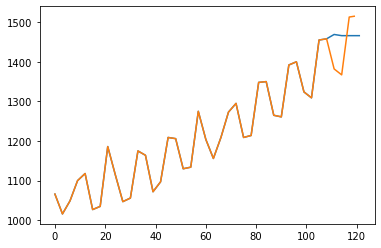

In [24]:
X_variables['California Median Weekly Wages'].plot()
test['California Median Weekly Wages'].plot()

## Add the higher polynomial again

In [25]:
for i in test.columns:
    if i == 'const':
        continue
    col = i+'**2'
    test[col]=test[i].transform(lambda x:x**2)

In [26]:
test = add_constant(test)
test

,const,unemployment rate,Poverty Rate (CA),California Median Weekly Wages,Median House Prices,unemployment rate**2,Poverty Rate (CA)**2,California Median Weekly Wages**2,Median House Prices**2
0,1.0,0.123,0.162333,1066.000000,279220.0,0.015129,0.026352,1.136356e+06,7.796381e+10
1,1.0,0.122,0.162667,1049.333333,271370.0,0.014884,0.026460,1.101100e+06,7.364168e+10
2,1.0,0.121,0.163000,1032.666667,286550.0,0.014641,0.026569,1.066400e+06,8.211090e+10
3,1.0,0.120,0.163333,1016.000000,294140.0,0.014400,0.026678,1.032256e+06,8.651834e+10
4,1.0,0.120,0.163667,1027.000000,292850.0,0.014400,0.026787,1.054729e+06,8.576112e+10
...,...,...,...,...,...,...,...,...,...
115,1.0,0.040,0.112167,1415.666667,655740.0,0.001600,0.012581,2.004112e+06,4.299949e+11
116,1.0,0.040,0.111333,1464.333333,644010.0,0.001600,0.012395,2.144272e+06,4.147489e+11
117,1.0,0.040,0.110500,1513.000000,643610.0,0.001600,0.012210,2.289169e+06,4.142338e+11
118,1.0,0.040,0.109667,1514.000000,628100.0,0.001600,0.012027,2.292196e+06,3.945096e+11


## We use values until Dec 2019 for the regression modeling (index = 108)

In [27]:
x = test.iloc[:108]
y = y_variable.iloc[:108]

In [28]:
sm.OLS(y, x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Overall Number of Homeless   R-squared:                       0.939
Model:                                    OLS   Adj. R-squared:                  0.935
Method:                         Least Squares   F-statistic:                     258.5
Date:                        Mon, 19 Apr 2021   Prob (F-statistic):           6.16e-59
Time:                                15:34:44   Log-Likelihood:                -978.94
No. Observations:                         108   AIC:                             1972.
Df Residuals:                             101   BIC:                             1991.
Df Model:                                   6                                         
Covariance Type:                    nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              3.317e+05   3.85e+04      8.621      0.000    2.55e+05    4.08e+05
unemployment rate                  3.348e+05    5.7e+04      5.877      0.000    2.22e+05    4.48e+05
Poverty Rate (CA)                 -2.603e+05   6.06e+04     -4.294      0.000    -3.8e+05    -1.4e+05
California Median Weekly Wages     -305.0116     54.475     -5.599      0.000    -413.076    -196.947
Median House Prices                  -0.1784      0.050     -3.567      0.001      -0.278      -0.079
unemployment rate**2               7.726e+04   1.31e+04      5.910      0.000    5.13e+04    1.03e+05
Poverty Rate (CA)**2              -8.479e+04   1.87e+04     -4.538      0.000   -1.22e+05   -4.77e+04
California Median Weekly Wages**2     0.1363      0.022      6.197      0.000       0.093       0.180
Median House Prices**2             2.672e-07   5.28e-08      5.059      0.000    1.62e-07    3.72e-07
==============================================================================
Omnibus:                        3.096   Durbin-Watson:                   0.428
Prob(Omnibus):                  0.213   Jarque-Bera (JB):                2.711
Skew:                          -0.207   Prob(JB):                        0.258
Kurtosis:                       3.656   Cond. No.                     3.34e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.34e+15. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## We can predictions on 2020 (index 108 and higher)

In [30]:
ols = sm.OLS(y, x).fit()
ypreds = ols.predict(test.iloc[108:])
ypreds.name = 'Overall Number of Homeless'

## Concatenate 2019 and 2020 Y-variable

In [31]:
y_new = pd.concat([y, ypreds])

In [30]:
new = pd.concat([year, period, y_new, test], axis=1)
new

,Year,Period,Overall Number of Homeless,const,unemployment rate,Poverty Rate (CA),California Median Weekly Wages,Median House Prices,unemployment rate**2,Poverty Rate (CA)**2,California Median Weekly Wages**2,Median House Prices**2
0,2011,Jan,129738.833300,1.0,0.123,0.162333,1066.000000,279220.0,0.015129,0.026352,1.136356e+06,7.796381e+10
1,2011,Feb,129319.666700,1.0,0.122,0.162667,1049.333333,271370.0,0.014884,0.026460,1.101100e+06,7.364168e+10
2,2011,Mar,128900.500000,1.0,0.121,0.163000,1032.666667,286550.0,0.014641,0.026569,1.066400e+06,8.211090e+10
3,2011,Apr,128481.333300,1.0,0.120,0.163333,1016.000000,294140.0,0.014400,0.026678,1.032256e+06,8.651834e+10
4,2011,May,128062.166700,1.0,0.120,0.163667,1027.000000,292850.0,0.014400,0.026787,1.054729e+06,8.576112e+10
...,...,...,...,...,...,...,...,...,...,...,...,...
117,2020,Oct,161783.806099,1.0,0.040,0.110500,1513.000000,643610.0,0.001600,0.012210,2.289169e+06,4.142338e+11
118,2020,Nov,159620.122891,1.0,0.040,0.109667,1514.000000,628100.0,0.001600,0.012027,2.292196e+06,3.945096e+11
119,2020,Dec,164418.912399,1.0,0.041,0.108833,1515.000000,653210.0,0.001681,0.011845,2.295225e+06,4.266833e+11
120,2021,Jan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
new.to_csv('2020_results_rev2.csv')